In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('C:\\Users\\VICTUS\\Desktop\\Machine Learning\\airline\\train.csv')

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
test_data = pd.read_csv('C:\\Users\\VICTUS\\Desktop\\Machine Learning\\airline\\test.csv')

In [5]:
data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0', 'id'],axis=1, inplace=True)

In [6]:
print(f'Number of rows in training data: {data.shape[0]}')
print(f'Number of rows in testing data: {test_data.shape[0]}')

Number of rows in training data: 103904
Number of rows in testing data: 25976


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
cat_cols_temp = ['Inflight wifi service', 'Departure/Arrival time convenient','Ease of Online booking','Gate location', 'Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']

In [10]:
data[cat_cols_temp] = data[cat_cols_temp].astype(object)

# Exploratory Data Analysis

In [11]:
cat_columns = data.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = data.select_dtypes(np.number).columns.to_list()
print(num_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


# Univariate Analysis

In [12]:
sample_data = data.sample(1000)

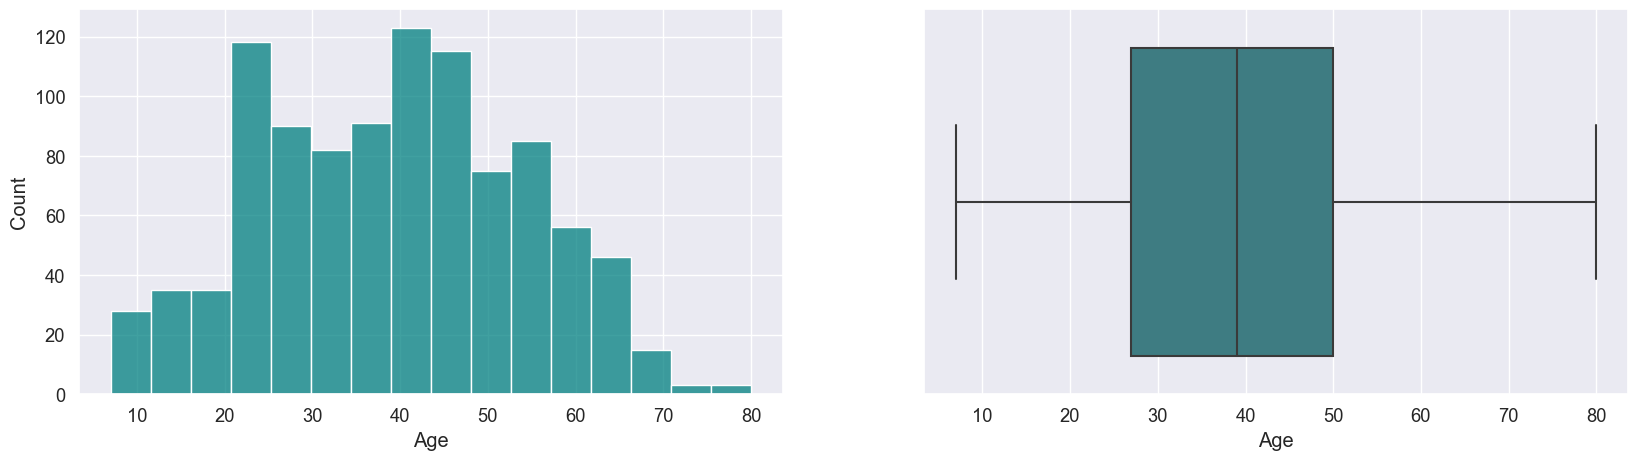

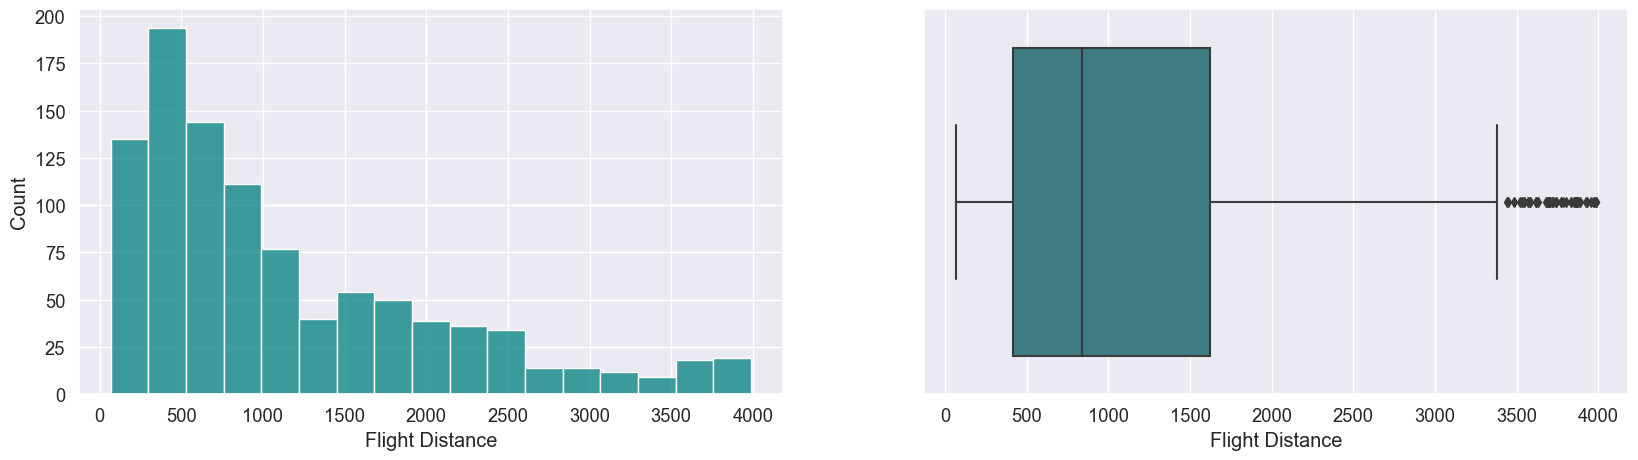

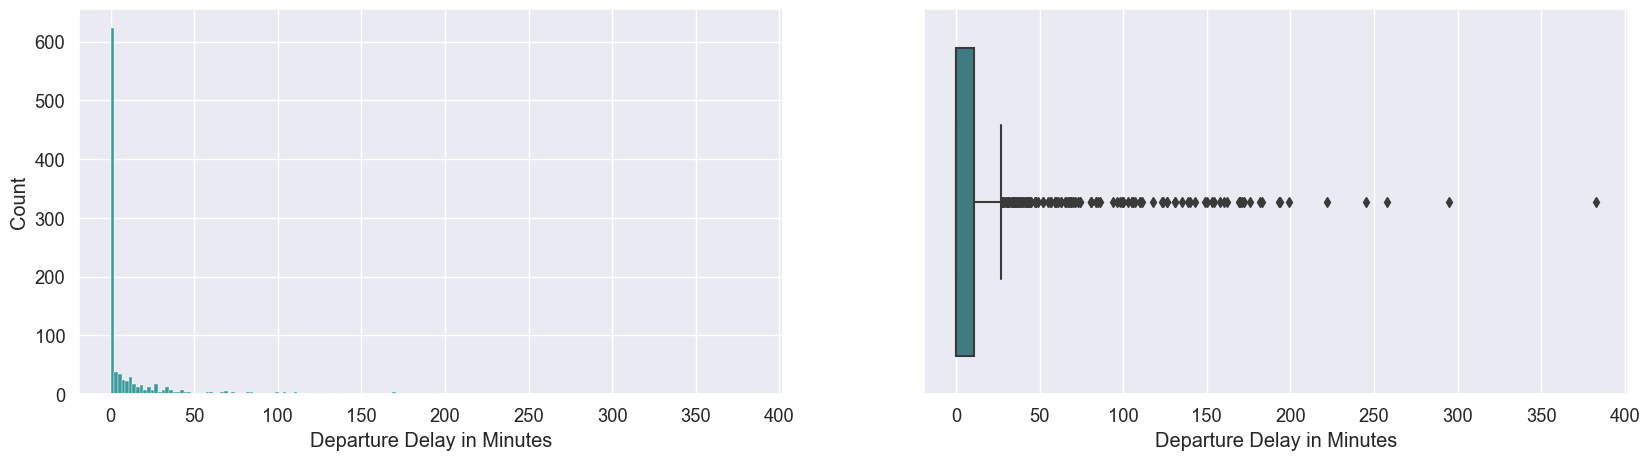

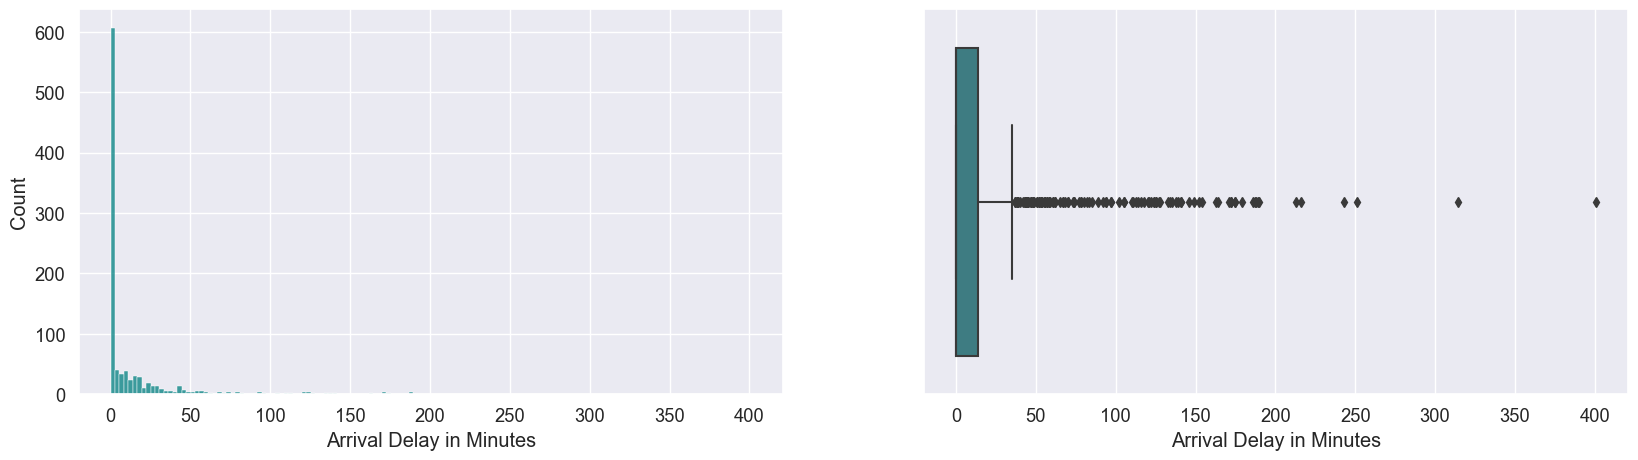

In [13]:
sns.set_context('notebook', font_scale = 1.2)
for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize = (20,5))
    sns.histplot(sample_data[col], ax = ax[0], color='teal')
    sns.boxplot(x=sample_data[col], ax=ax[1],palette='crest')

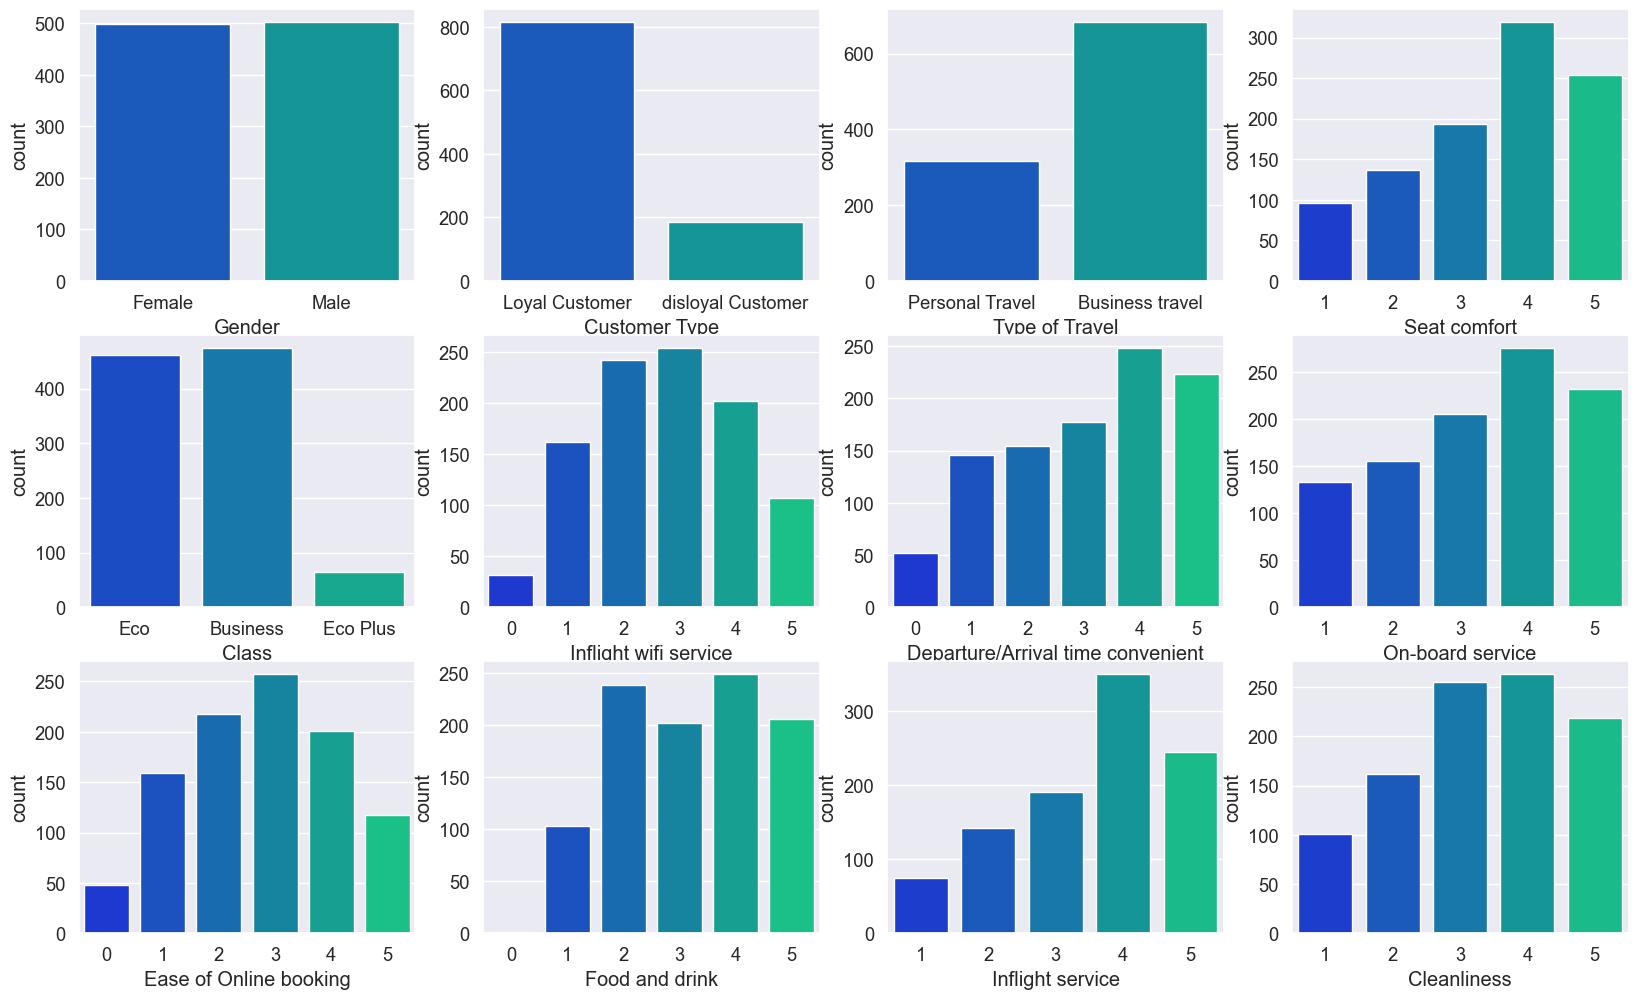

In [14]:
fig, axes = plt.subplots(3, 4, figsize = (20,12))
sns.countplot(x='Gender', data=sample_data,palette='winter',ax = axes[0,0]);
sns.countplot(x='Customer Type', data=sample_data,palette='winter',ax = axes[0,1]);
sns.countplot(x='Type of Travel', data=sample_data,palette='winter',ax = axes[0,2]);
sns.countplot(x='Seat comfort', data=sample_data,palette='winter',ax = axes[0,3]);
sns.countplot(x='Class', data=sample_data,palette='winter',ax = axes[1,0]);
sns.countplot(x='Inflight wifi service', data=sample_data,palette='winter',ax = axes[1,1]);
sns.countplot(x='Departure/Arrival time convenient', data=sample_data,palette='winter',ax = axes[1,2]);
sns.countplot(x='On-board service', data=sample_data,palette='winter',ax = axes[1,3]);
sns.countplot(x='Ease of Online booking', data=sample_data,palette='winter',ax = axes[2,0]);
sns.countplot(x='Food and drink', data=sample_data,palette='winter',ax = axes[2,1]);
sns.countplot(x='Inflight service', data=sample_data,palette='winter',ax = axes[2,2]);
sns.countplot(x='Cleanliness', data=sample_data,palette='winter',ax = axes[2,3]);

# Bivariate Analysis

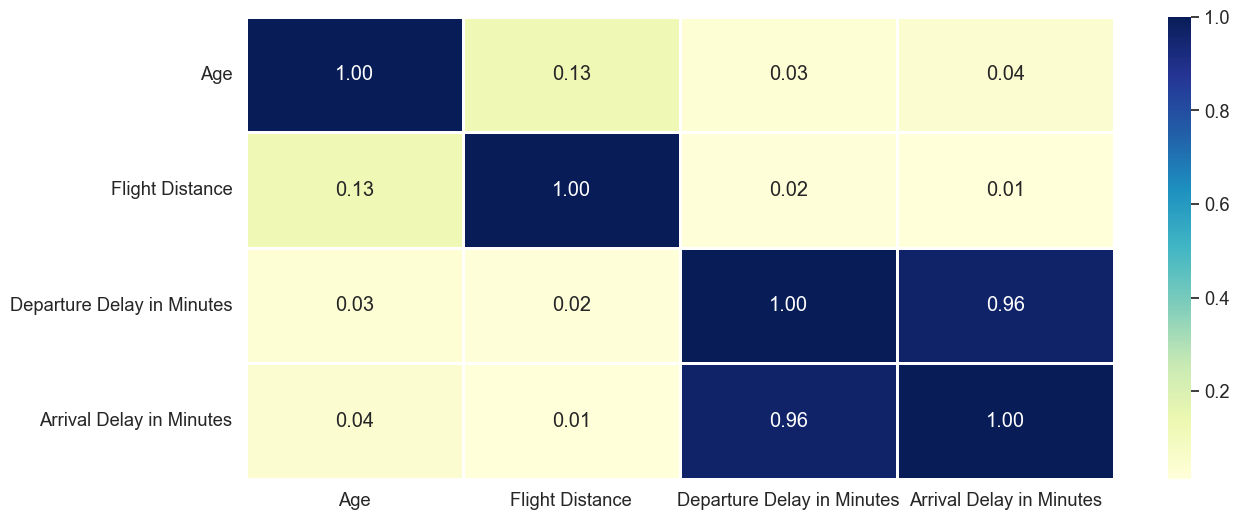

In [16]:
with sns.axes_style('white'):
    plt.figure(figsize = (14,6))
    sns.heatmap(sample_data.corr(),annot=True,fmt='.2f',linewidths=0.8, cmap='YlGnBu')

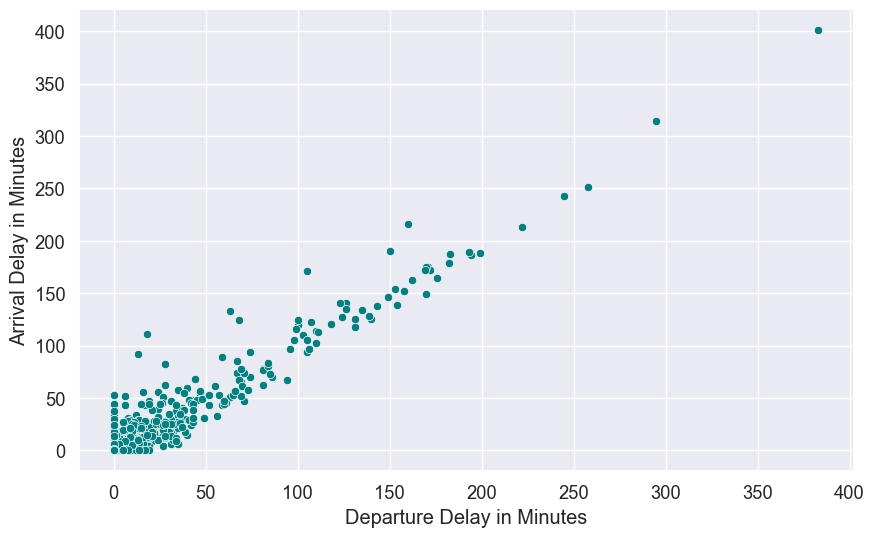

In [17]:
#since we have heavily correlation between departure delay and arrival delay, one of them should be dropped.
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Departure Delay in Minutes', y= 'Arrival Delay in Minutes', data=sample_data, color='teal')
plt.show()

In [18]:
data.drop('Departure Delay in Minutes', axis=1, inplace=True)
test_data.drop('Departure Delay in Minutes',axis=1,inplace=True)

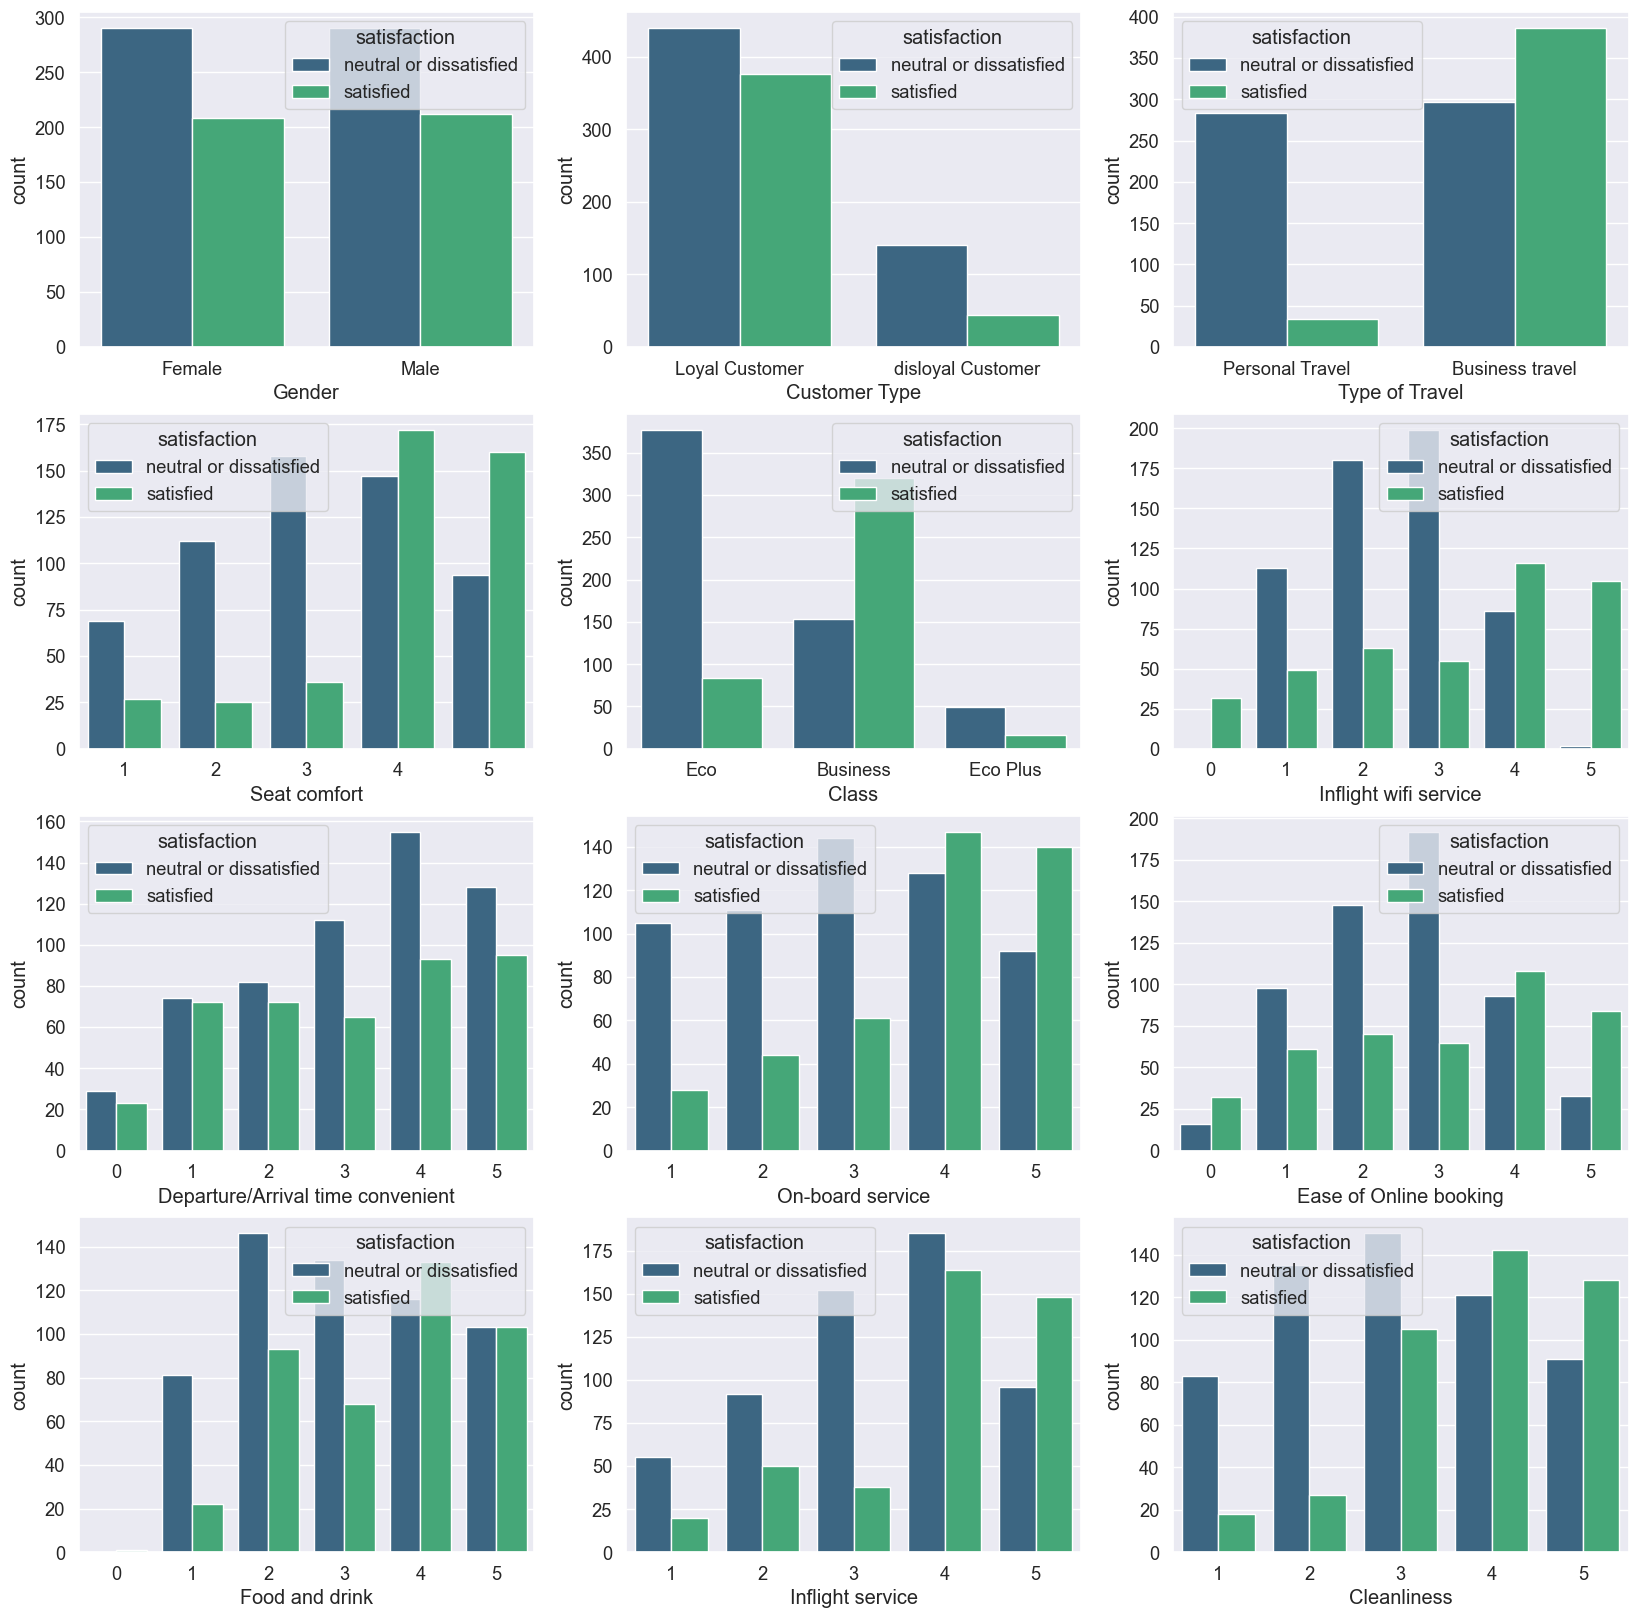

In [21]:
fig, axes = plt.subplots(4, 3, figsize = (20,20))
sns.countplot(x = 'Gender', data= sample_data, hue = 'satisfaction',palette='viridis', ax = axes[0,0]);
sns.countplot(x = 'Customer Type', data= sample_data, hue = 'satisfaction',palette='viridis', ax = axes[0,1]);
sns.countplot(x = 'Type of Travel', data= sample_data, hue = 'satisfaction',palette='viridis', ax = axes[0,2]);
sns.countplot(x = 'Seat comfort', data= sample_data, hue = 'satisfaction',palette='viridis', ax = axes[1,0]);
sns.countplot(x = 'Class', data= sample_data, hue = 'satisfaction',palette='viridis', ax = axes[1,1]);
sns.countplot(x = 'Inflight wifi service', data= sample_data, hue = 'satisfaction',palette='viridis', ax = axes[1,2]);
sns.countplot(x = 'Departure/Arrival time convenient', data= sample_data, hue = 'satisfaction',palette='viridis', ax = axes[2,0]);
sns.countplot(x = 'On-board service', data= sample_data, hue = 'satisfaction',palette='viridis', ax = axes[2,1]);
sns.countplot(x = 'Ease of Online booking', data= sample_data, hue = 'satisfaction',palette='viridis', ax = axes[2,2]);
sns.countplot(x = 'Food and drink', data= sample_data, hue = 'satisfaction',palette='viridis', ax = axes[3,0]);
sns.countplot(x = 'Inflight service', data= sample_data, hue = 'satisfaction',palette='viridis', ax = axes[3,1]);
sns.countplot(x = 'Cleanliness', data= sample_data, hue = 'satisfaction',palette='viridis', ax = axes[3,2]);

# Data Cleaning

Filling missing values

In [22]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [23]:
median_val = data['Arrival Delay in Minutes'].median()
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(median_val)
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].fillna(median_val)

In [24]:
data[cat_columns].nunique()

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

In [26]:
columns_containing_0 = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Inflight service', 'Cleanliness']
modes = data[columns_containing_0].mode()
data[columns_containing_0] = data[columns_containing_0].replace({'0': modes})
test_data[columns_containing_0] = test_data[columns_containing_0].replace({'0': modes})

# Feature Transformation

In [27]:
#since lot of features were skewed, i will apply log transformation

In [28]:
data['Flight Distance'] = np.log1p(data['Flight Distance'])
test_data['Flight Distance'] = np.log1p(test_data['Flight Distance'])
test_data['Arrival Delay in Minutes'] = np.log1p(test_data['Arrival Delay in Minutes'])

# Encoding

In [29]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer':0, 'disloyal Customer':1})
data['Type of Travel'] = data['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
data['Class'] = data['Class'].map({'Business':2, 'Eco Plus':1, 'Eco': 0})
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})


test_data['Gender'] = test_data['Gender'].map({'Male':0, 'Female':1})
test_data['Customer Type'] = test_data['Customer Type'].map({'Loyal Customer':0, 'disloyal Customer':1})
test_data['Type of Travel'] = test_data['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
test_data['Class'] = test_data['Class'].map({'Business':2, 'Eco Plus':1, 'Eco': 0})
test_data['satisfaction'] = test_data['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})

# Feature Scaling

In [54]:
X_train = data.drop('satisfaction',axis=1)
y_train = data.satisfaction

X_test = test_data.drop('satisfaction',axis=1)
y_test = test_data.satisfaction

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import scikitplot


s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)



# K Nearest Neighbors

In [56]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
k = KFold(n_splits = 5)
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()
print("Accuracy on the training set:", round(score, 3))

C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Accuracy on the training set: 0.926


In [61]:
y_pred = knn.predict(X_test)
print('Accuracy on the test set:', round(accuracy_score(y_test, y_pred),3))

C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy on the test set: 0.926


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     14573
           1       0.94      0.89      0.91     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976



# Choosing a K value

In [62]:
accuracy = []
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)
    accuracy.append(accuracy_i)

C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

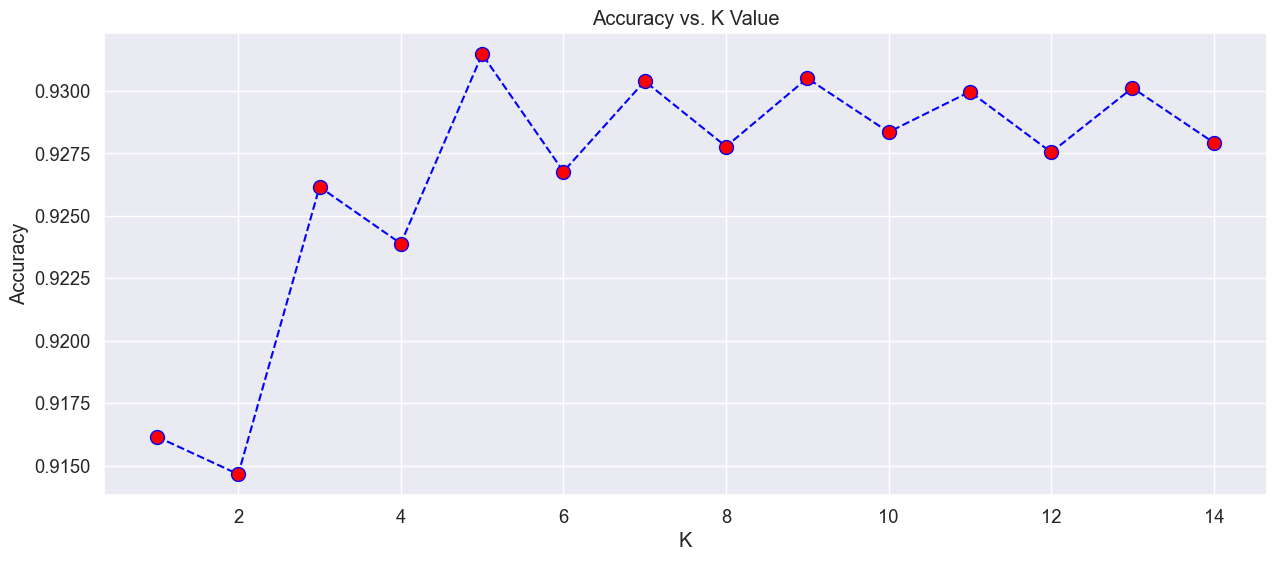

In [65]:
plt.figure(figsize = (15,6))
plt.plot(range(1,15,1), accuracy, color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [67]:
# when k=5, we have maximum accuracy
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Evaluation of the model

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy * 100, 2)}%')

Accuracy: 93.15%


In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14573
           1       0.95      0.89      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

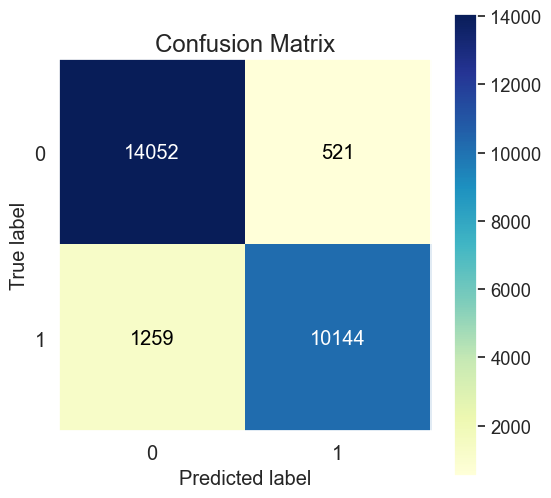

In [70]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred, figsize = (6,6), cmap = 'YlGnBu')